In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\workoopolis\projects\TCS.NS.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-08-06,622.500000,624.000000,612.599976,614.450012,484.778229,1015540.0
1,2012-08-07,619.500000,633.099976,617.325012,632.025024,498.644257,2099154.0
2,2012-08-08,632.500000,633.325012,623.200012,624.599976,492.786163,1643000.0
3,2012-08-09,625.125000,633.924988,625.125000,629.075012,496.316803,1129474.0
4,2012-08-10,628.000000,642.500000,627.875000,640.025024,504.955872,3082356.0
...,...,...,...,...,...,...,...
2953,2024-07-30,4391.100098,4398.000000,4327.299805,4365.350098,4365.350098,1797906.0
2954,2024-07-31,4350.000000,4414.000000,4345.000000,4385.350098,4385.350098,2330091.0
2955,2024-08-01,4399.399902,4419.299805,4365.049805,4397.100098,4397.100098,2202244.0
2956,2024-08-02,4365.000000,4398.000000,4270.000000,4283.049805,4283.049805,2811282.0


### Variables in the dataset
Date: Represents the date of of the relavant transaction day

Open: Reprsents the stock opening on that particular day

High : represents the highest price of the relavant trading day

Low: Represents the lowest price of the relevant trading day

Close: Represents the closing price of the stock on the relavant transaction day

Adj close : Represents the adjusted closing price of the stock of the relavant trading day

Volume: It represents the trading volume information of the relavant trading day

In [4]:
print(f"The rows and columns in the dataset:{df.shape}")
print(f"\nThe column names of the dataset :{df.columns}")

The rows and columns in the dataset:(2958, 7)

The column names of the dataset :Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 0 to 2957
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2958 non-null   object 
 1   Open       2954 non-null   float64
 2   High       2954 non-null   float64
 3   Low        2954 non-null   float64
 4   Close      2954 non-null   float64
 5   Adj Close  2954 non-null   float64
 6   Volume     2954 non-null   float64
dtypes: float64(6), object(1)
memory usage: 161.9+ KB


### Non Graphical Analysis


In [7]:
#Converting the data type of Date column to date_time using pd.to_datetime
df.Date = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 0 to 2957
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2958 non-null   datetime64[ns]
 1   Open       2954 non-null   float64       
 2   High       2954 non-null   float64       
 3   Low        2954 non-null   float64       
 4   Close      2954 non-null   float64       
 5   Adj Close  2954 non-null   float64       
 6   Volume     2954 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 161.9 KB


In [8]:
print("Min date:", df['Date'].min().date())
print("Max date:", df['Date'].max().date())

Min date: 2012-08-06
Max date: 2024-08-05


As we can see we have historical data of the past twelve years of TCS

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-08-06,622.500,624.000000,612.599976,614.450012,484.778229,1015540.0
1,2012-08-07,619.500,633.099976,617.325012,632.025024,498.644257,2099154.0
2,2012-08-08,632.500,633.325012,623.200012,624.599976,492.786163,1643000.0
3,2012-08-09,625.125,633.924988,625.125000,629.075012,496.316803,1129474.0
4,2012-08-10,628.000,642.500000,627.875000,640.025024,504.955872,3082356.0


In [11]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [12]:
df.isna().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [13]:
#Filling Na values using Imputer techniques
from sklearn.impute import SimpleImputer

In [14]:
si= SimpleImputer(strategy ='mean')
df[['Open','High','Low','Close','Adj Close', 'Volume']] = si.fit_transform(df[['Open','High','Low','Close','Adj Close', 'Volume']])

In [15]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Axes: >

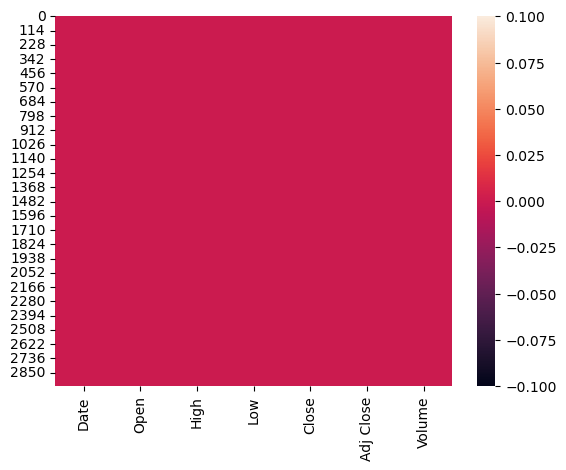

In [16]:
#visualising null values
sns.heatmap(df.isnull())

In [17]:
df['Volume']=df['Volume'].astype('int64')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 0 to 2957
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2958 non-null   datetime64[ns]
 1   Open       2958 non-null   float64       
 2   High       2958 non-null   float64       
 3   Low        2958 non-null   float64       
 4   Close      2958 non-null   float64       
 5   Adj Close  2958 non-null   float64       
 6   Volume     2958 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 161.9 KB


In [19]:
# setting date as index in our dataset using .set_index
df.set_index('Date', inplace = True)

In [20]:
#Checking no of unique values in the dataset
df.nunique().to_frame("No of unique values")

,No of unique values
Open,2322
High,2620
Low,2664
Close,2853
Adj Close,2936
Volume,2951


In [21]:
# checking value_counts for each column of the dataset
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Open
1250.000000    11
2060.000000     7
1260.000000     7
3350.000000     6
1235.000000     6
               ..
1251.000000     1
1241.449951     1
1243.349976     1
1239.949951     1
4239.000000     1
Name: count, Length: 2322, dtype: int64


High
1252.500000    6
1265.000000    6
1305.000000    6
1217.500000    5
1295.000000    5
              ..
1146.000000    1
1147.375000    1
1135.400024    1
1118.925049    1
4419.299805    1
Name: count, Length: 2620, dtype: int64


Low
1235.000000    6
1225.000000    5
1250.000000    5
1227.500000    4
2036.131386    4
              ..
1121.150024    1
1102.599976    1
1085.000000    1
1084.949951    1
4110.500000    1
Name: count, Length: 2664, dtype: int64


Close
2056.700965    4
1349.599976    3
1256.900024    3
1261.449951    3
1253.025024    3
              ..
1215.400024    1
1202.574951    1
1193.175049    1
1194.375000    1
4172.799805    1
Name: count, Length: 2853, dtype: int64


Adj Close
1882.480815    4
1081.960083    2
499.82696

By looking at the non graphical analysis we can see that the close column and adj close column have more or less the same data so we can remove one of them

In [23]:
df.drop(["Adj Close"],axis = 1, inplace = True)

In [24]:
# checking for the duplicate values in dataset using .duplicated()
print("The total duplicate values in the dataset are", df.duplicated().sum())

The total duplicate values in the dataset are 3


In [25]:
df = df.drop_duplicates()

In [26]:
df.duplicated().sum()

0

In [27]:
# statistical summary of the dataset
df.describe()

,Open,High,Low,Close,Volume
count,2955.000000,2955.000000,2955.000000,2955.000000,2.955000e+03
mean,2057.302987,2077.456860,2036.131386,2056.700965,2.649046e+06
std,1038.674403,1047.122357,1029.829799,1038.440876,2.258682e+06
min,607.349976,612.500000,527.500000,602.750000,0.000000e+00
25%,1219.349976,1230.000000,1207.575012,1218.662536,1.640486e+06
50%,1832.300049,1867.400024,1809.949951,1829.000000,2.211822e+06
75%,3182.000000,3210.000000,3147.025024,3177.099976,3.089852e+06
max,4415.000000,4431.000000,4371.000000,4397.100098,8.806715e+07


### Observations:

1. Dataset doesnot contain any null values or missing values since the count of all the numericalcolumns are same.
2. The median is lower than mean value in the columns of Open, High, Low this means the data is skewed right in these columns.
3. There is also huge difference between the 75 % values and max values of the columns which suggest that there are outliers.
4. There is also huge difference between the 25 % values and min values of the columns which suggest that there are outliers.

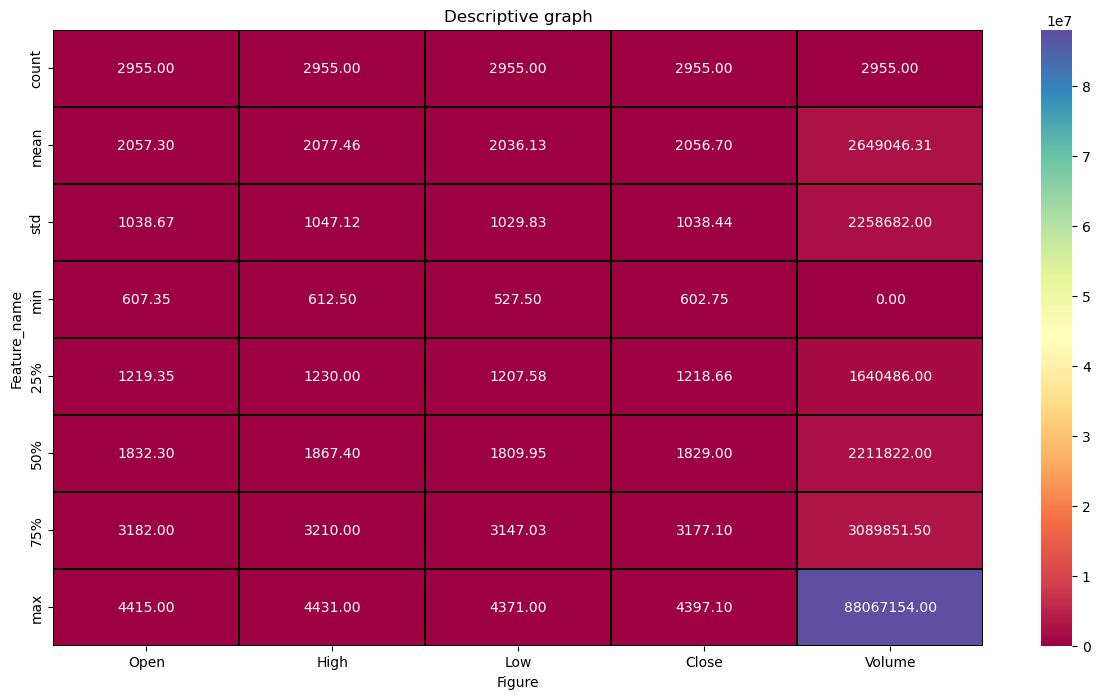

In [29]:
plt.figure(figsize = (15,8))
sns.heatmap(df.describe(), annot = True, fmt = '0.2f', linewidth = 0.3, linecolor = 'black', cmap = 'Spectral')
plt.xlabel('Figure')
plt.ylabel('Feature_name')
plt.title('Descriptive graph')
plt.show()

## Graphical Analysis

### Univariate Analysis

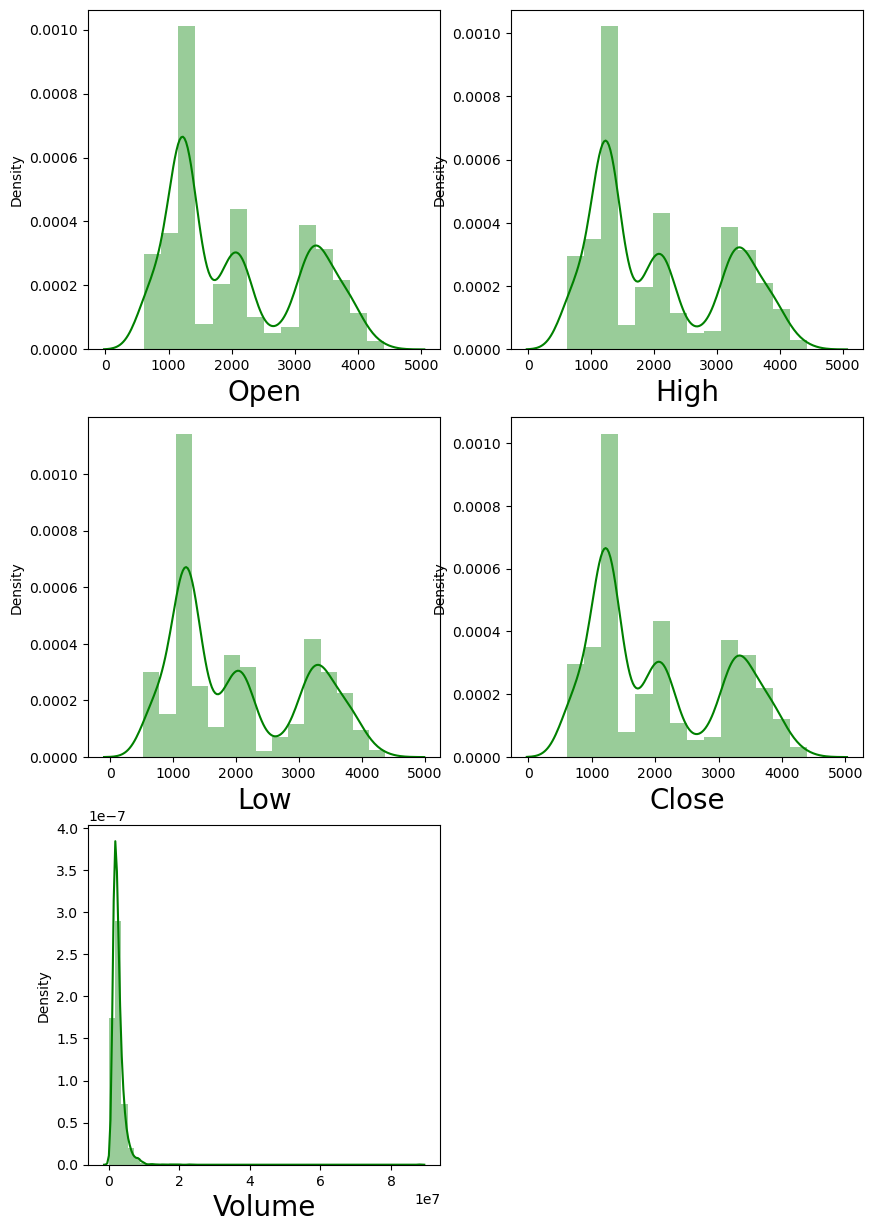

In [32]:
#Checking the distribution of all the columns
plt.figure(figsize = (10,15))
c = 1
for i in df.columns:
    if c<=5:
        plt.subplot(3,2,c)
        sns.distplot(df[i], color = 'green')
        plt.xlabel(i,fontsize = 20)
    c+=1
plt.show()

In [33]:
#Checking the skewness of the data
df.skew()

Open       0.484638
High       0.483366
Low        0.488155
Close      0.486351
Volume    19.541542
dtype: float64

Skewness is more in  the column volumne so lets fix the skewness using cuberoot method

In [35]:
df['Volume']= np.cbrt(df['Volume'])

In [36]:
df.skew()

Open      0.484638
High      0.483366
Low       0.488155
Close     0.486351
Volume    1.505895
dtype: float64

Now the skewness is fixed let's check the ditribution of the data now

<Axes: xlabel='Volume', ylabel='Density'>

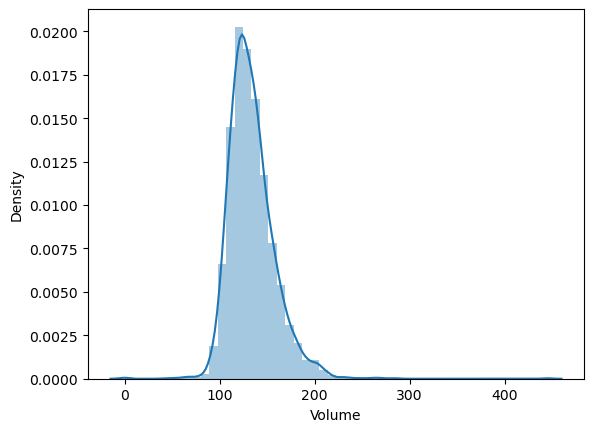

In [38]:
sns.distplot(df['Volume'])

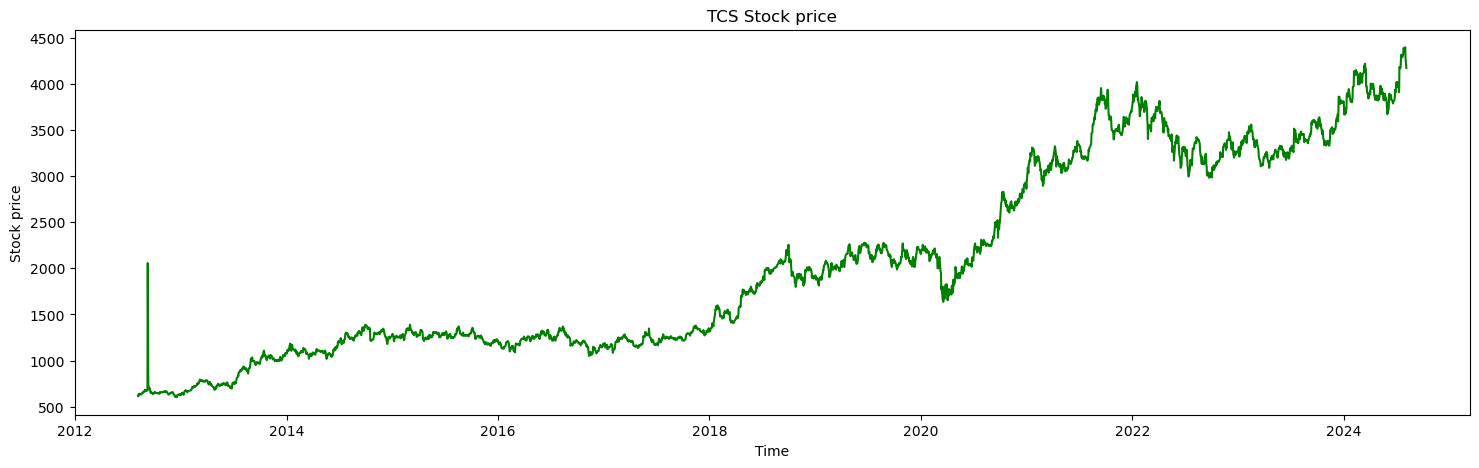

In [39]:
plt.figure(figsize = (18,5))
plt.plot(df.Close, label = 'Closing price', color = 'green')
plt.ylabel("Stock price")
plt.xlabel("Time")
plt.title("TCS Stock price")
plt.show()

From the above plot we can see that there was huge dip at the mid of the 2012 year period from there the stock recovered gradually and again there was a sharp dip at the start of 2020 might be due to Covid and then started to grow with good margins and from there it has been highs and lows till date

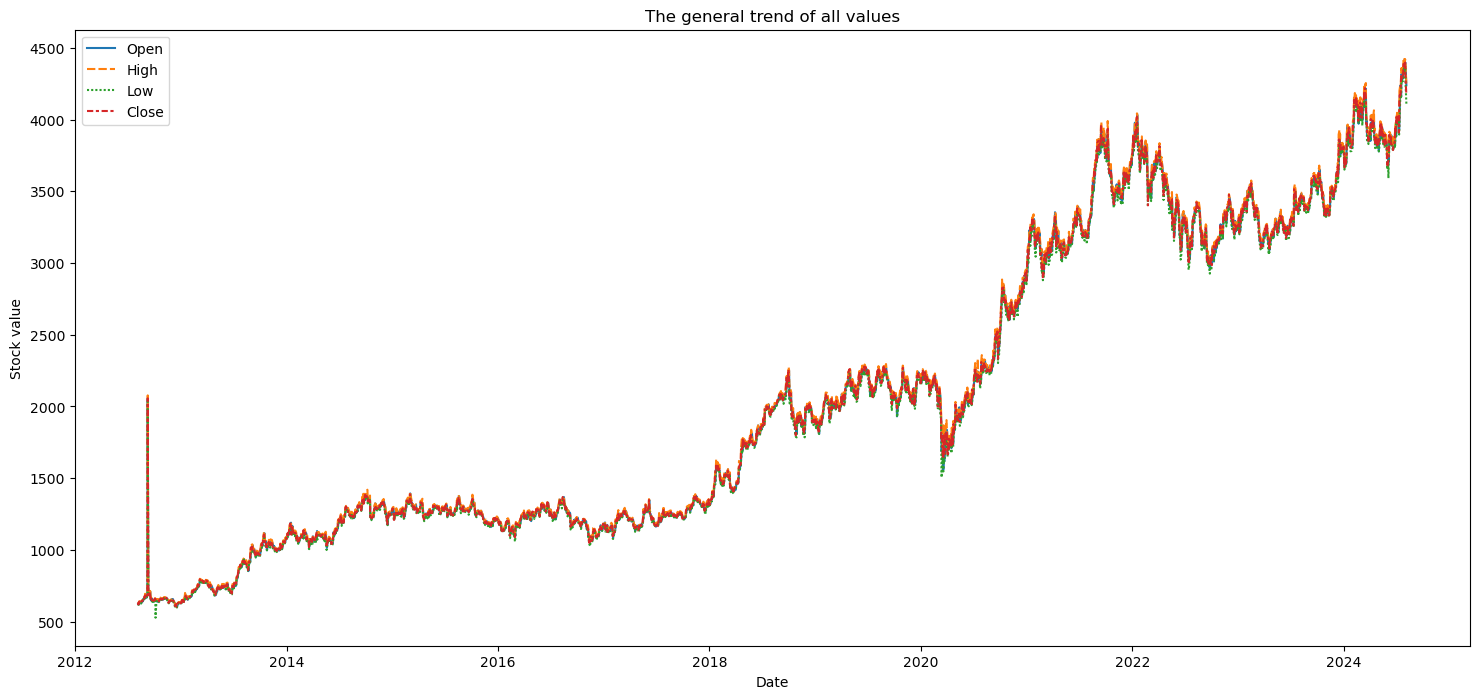

In [41]:
plt.figure(figsize = (18,8))
sns.lineplot(data = df.iloc[:,:-1])
plt.ylabel('Stock value')
plt.title("The general trend of all values")
plt.show()

By looking at the above plot we can see that all are correlated to each other as they are increasing and decreasing simultaniously

### Bivariate Analysis

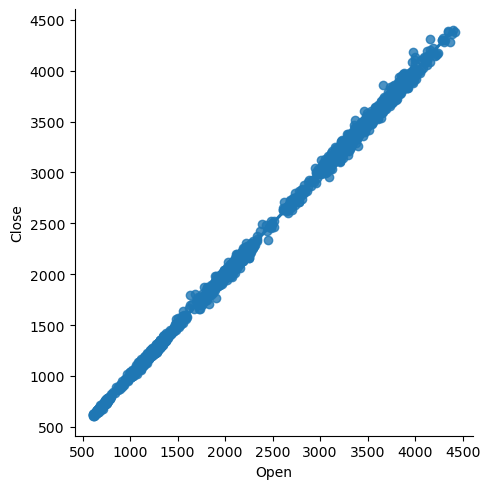

<Figure size 640x480 with 0 Axes>

In [44]:
sns.lmplot(x = 'Open', y = 'Close', data = df, palette = '#57609E')
plt.show()
plt.savefig('Relation between Open and Close')

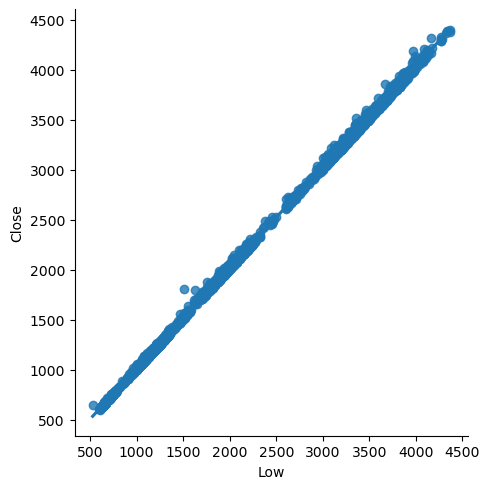

In [45]:
sns.lmplot(x = 'Low', y = 'Close', data =df)
plt.show()

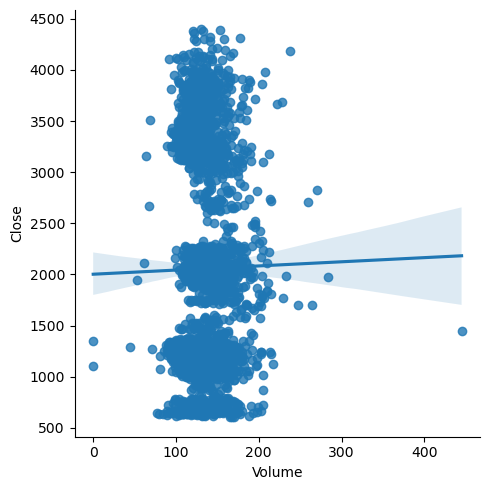

In [46]:
sns.lmplot(x = 'Volume', y = 'Close', data = df)
plt.show()

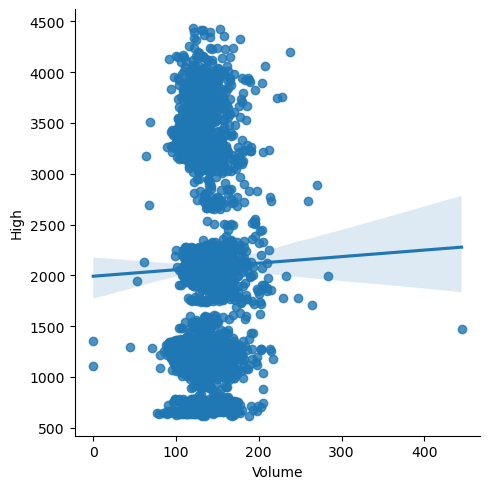

In [47]:
sns.lmplot(x = 'Volume', y = 'High', data = df)
plt.show()

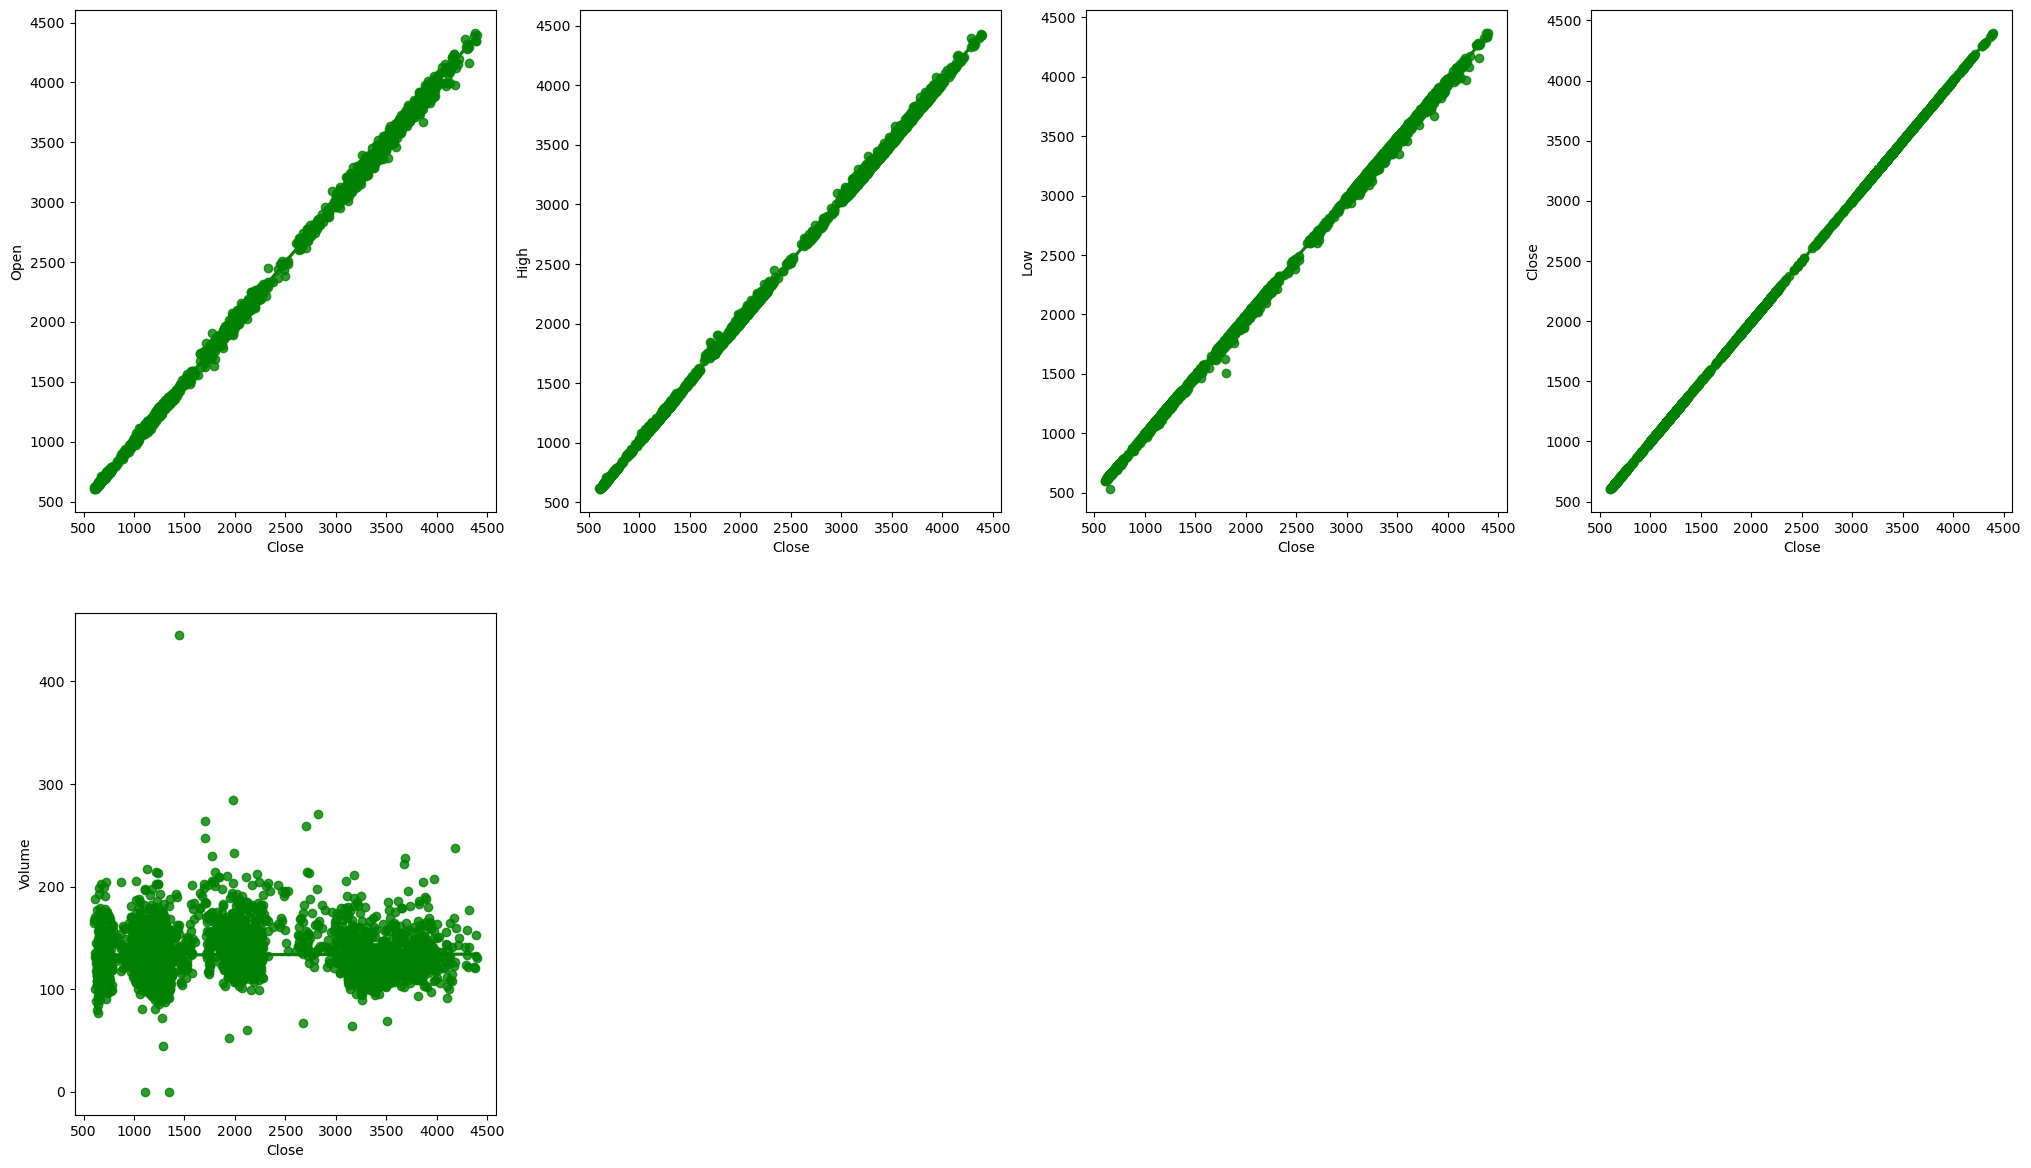

In [48]:
plt.figure(figsize = (25,30))
p = 1
for i in df:
    if p <=17:
        plt.subplot(4,4,p)
        sns.regplot(x = 'Close', y = i, data = df, color = 'green')
        plt.xlabel('Close')
        plt.ylabel(i)
    p+=1
plt.show()

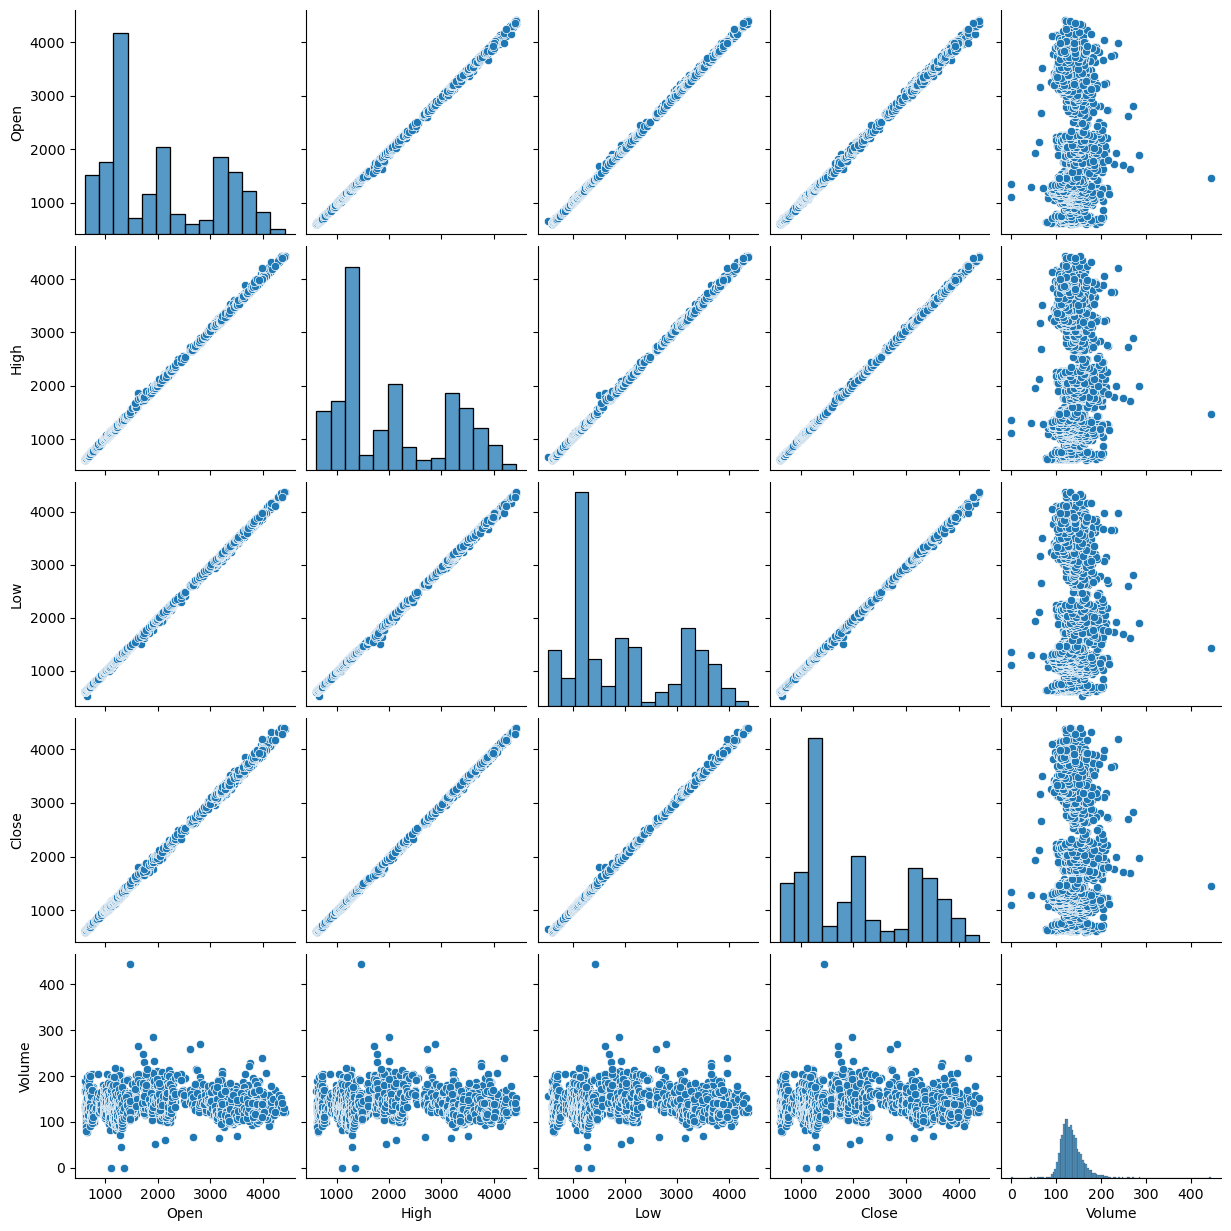

In [49]:
sns.pairplot(data = df, palette = 'ocean_r')

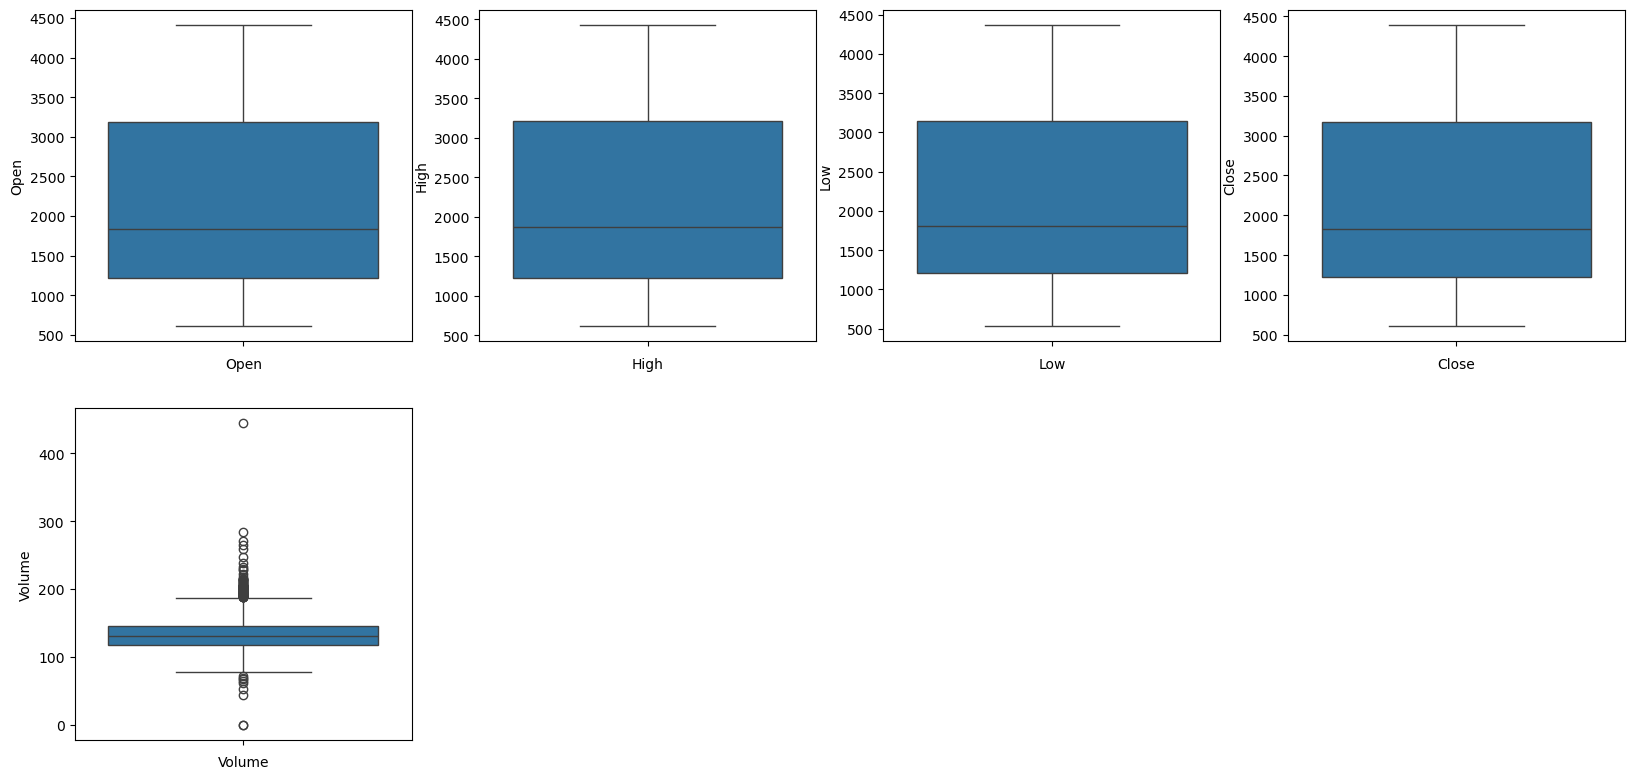

In [50]:
# Checking outliers
plt.figure(figsize = (20,25))
c = 1
for i in df:
    if c<=13:
        ax = plt.subplot(5,4,c)
        sns.boxplot(y = df[i], orient = 'h')
        plt.xlabel(i)
        
    c+=1
plt.show()

In [51]:
features= df['Volume']
# 1st quantile
Q1 = features.quantile(0.25)
# 3rd quantile
Q3 = features.quantile(0.75)
# IQR
IQR = Q3-Q1

df1 = df[~((features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR)))]

In [52]:
print("The percentage loss of the data : ", ((df.shape[0]-df1.shape[0])/df.shape[0])*100,"%")
df1.shape

The percentage loss of the data :  3.1472081218274113 %


(2862, 5)

In [98]:
df1.shape

(2862, 5)

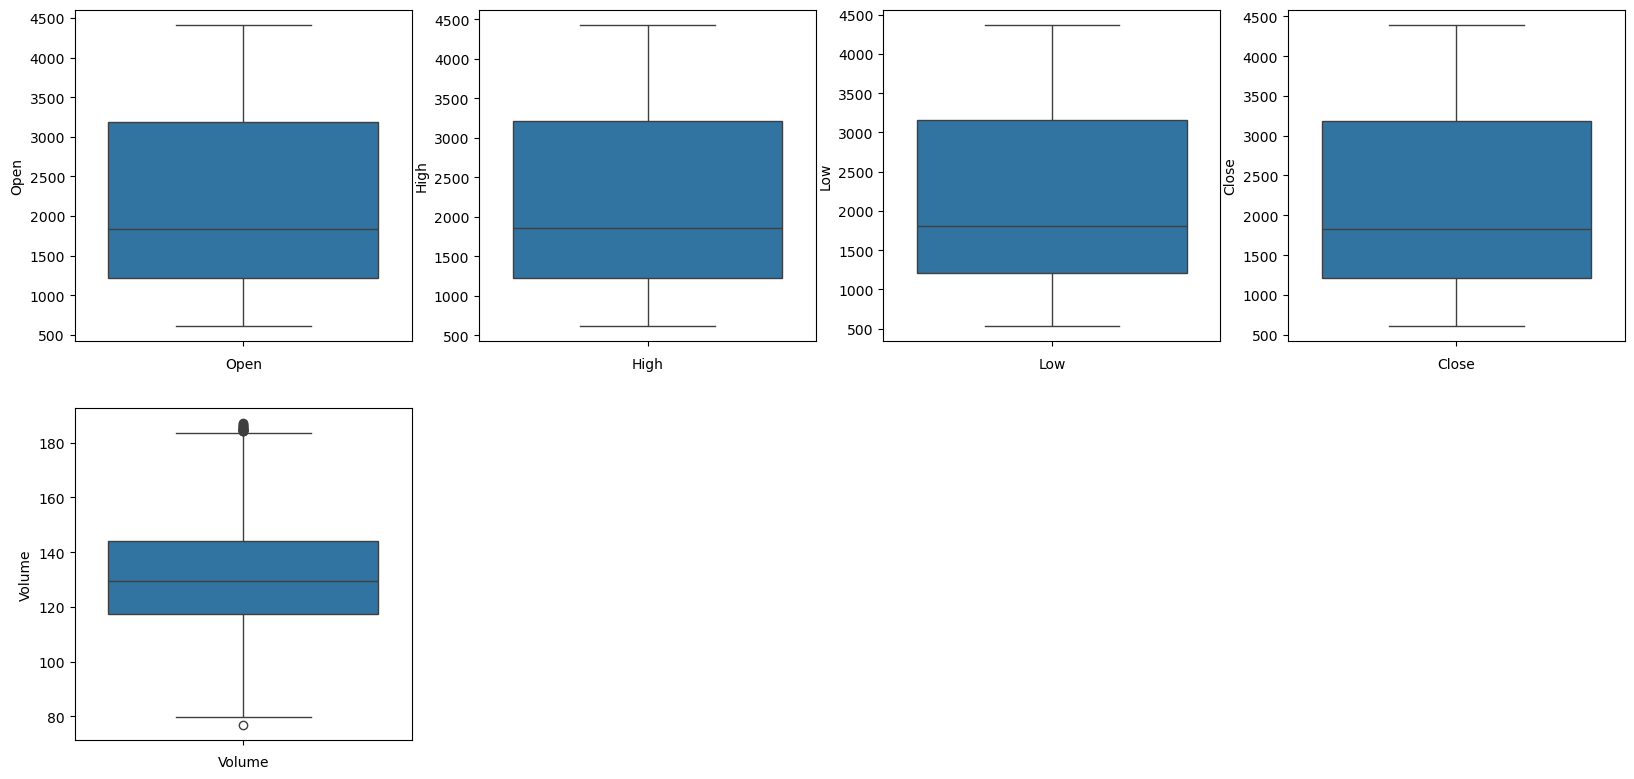

In [100]:
# Checking outliers
plt.figure(figsize = (20,25))
c = 1
for i in df1:
    if c<=13:
        ax = plt.subplot(5,4,c)
        sns.boxplot(y = df1[i], orient = 'h')
        plt.xlabel(i)
        
    c+=1
plt.show()

Now you can see that the outliers has been almost removed and we are good to go  for the model prediction

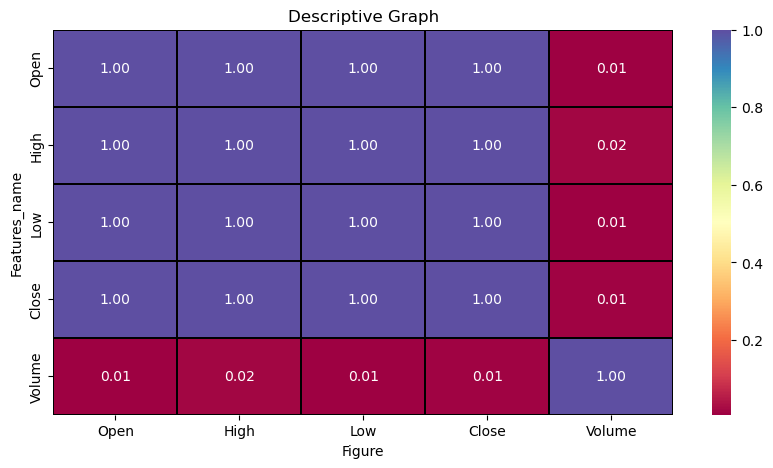

In [103]:
#Checking corelation
plt.figure(figsize = (10,5))
sns.heatmap(df1.corr(), annot = True, fmt = '0.2f', linewidth = 0.22, linecolor = 'black', cmap = 'Spectral')
plt.xlabel('Figure')
plt.title('Descriptive Graph')
plt.ylabel('Features_name')
plt.show()

In [105]:
df1.corr().Close.sort_values()

Volume    0.012374
Open      0.999640
Low       0.999855
High      0.999869
Close     1.000000
Name: Close, dtype: float64

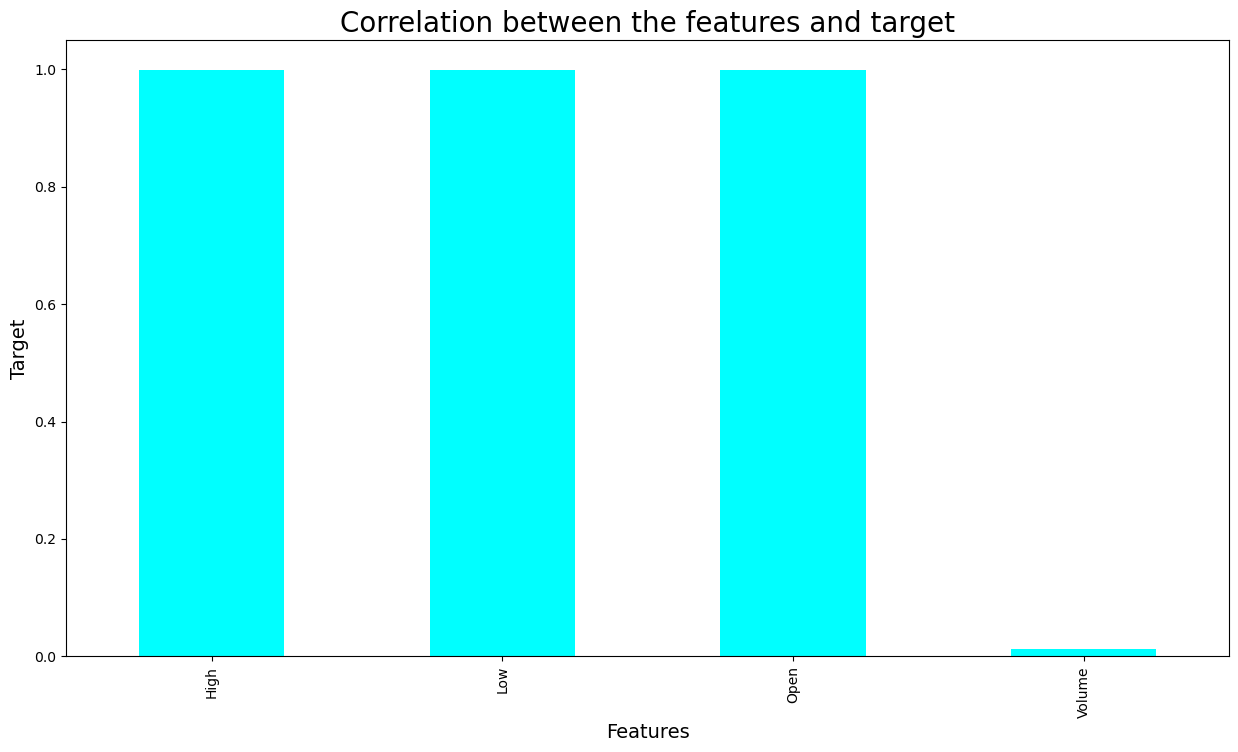

In [107]:
plt.figure(figsize = (15,8))
df1.corr()['Close'].sort_values(ascending = False).drop(['Close']).plot(kind = 'bar', color = 'cyan')
plt.xlabel('Features', fontsize = 14)
plt.ylabel('Target', fontsize = 14)
plt.title('Correlation between the features and target', fontsize = 20 )
plt.show()

From the above barplot we can say the feature variables are positively correlated with the target variable. Volumne feature is minimally correlated when compared to others

In [110]:
x = df1.drop('Close', axis = 1)
y = df1.Close

print(x.shape)
print(y.shape)

(2862, 4)
(2862,)


In [112]:
#Feature Scaling using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [114]:
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns) 
x

,Open,High,Low,Volume
0,-1.376065,-1.382305,-1.377349,-1.590778
1,-1.378941,-1.373653,-1.372782,-0.191442
2,-1.366482,-1.373439,-1.367103,-0.701931
3,-1.373550,-1.372868,-1.365242,-1.406411
4,-1.370794,-1.364715,-1.362584,0.697822
...,...,...,...,...
2857,2.235705,2.206004,2.213129,-0.519035
2858,2.196315,2.221217,2.230237,0.039010
2859,2.243659,2.226256,2.249616,-0.086581
2860,2.210691,2.206004,2.157745,0.474247


We have scaled the data using StandardScaler i.r standard scalarization method to overcome the issue of biasness


### Model building

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [124]:
# Finding the best random state
maxAccu = 0
maxRs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = .30,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs = i
print('Maximum r2 score is', maxAccu,"on Random State", maxRs)

Maximum r2 score is 0.9999052200808068 on Random State 90


In [126]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRs)

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [132]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr =lr.predict(x_test)
pred_train = lr.predict(x_train)
print("R2 score on test data:", r2_score(y_test,pred_lr))
print("R2 score on train data:", r2_score(y_train,pred_train)*100)
print('mean_absolute_error:',mean_absolute_error(y_test,pred_lr))
print('Mean squared error:', mean_squared_error(y_test, pred_lr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_lr)))

R2 score on test data: 0.9999052200808068
R2 score on train data: 99.98786569419984
mean_absolute_error: 7.4200973543486155
Mean squared error: 99.3877841821943
Root mean squared error: 9.969342214117955


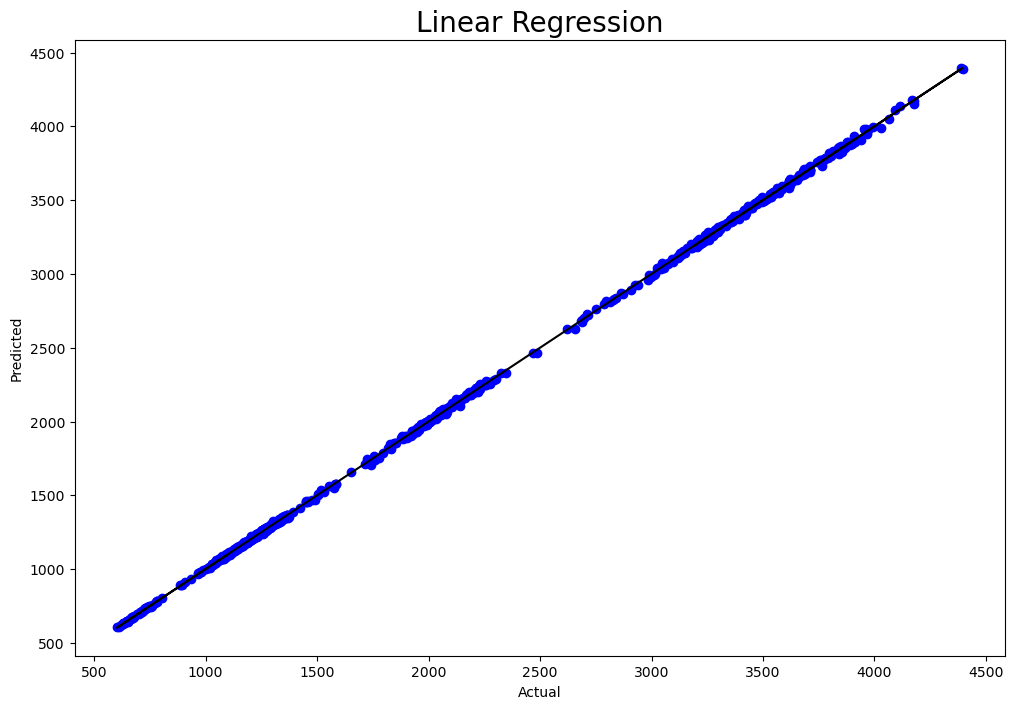

In [134]:
plt.figure(figsize = (12,8))
plt.scatter(x = pred_lr, y = y_test, color = 'blue')
plt.plot(pred_lr, pred_lr, color = 'black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression', fontsize = 20)
plt.show()

In [136]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred_rf =rf.predict(x_test)
pred_train = rf.predict(x_train)
print("R2 score on test data:", r2_score(y_test,pred_lr))
print("R2 score on train data:", r2_score(y_train,pred_train)*100)
print('mean_absolute_error:',mean_absolute_error(y_test,pred_rf))
print('Mean squared error:', mean_squared_error(y_test, pred_rf))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_rf)))

R2 score on test data: 0.9999052200808068
R2 score on train data: 99.99688583703433
mean_absolute_error: 9.871279500026434
Mean squared error: 198.8694385333263
Root mean squared error: 14.102107591893004


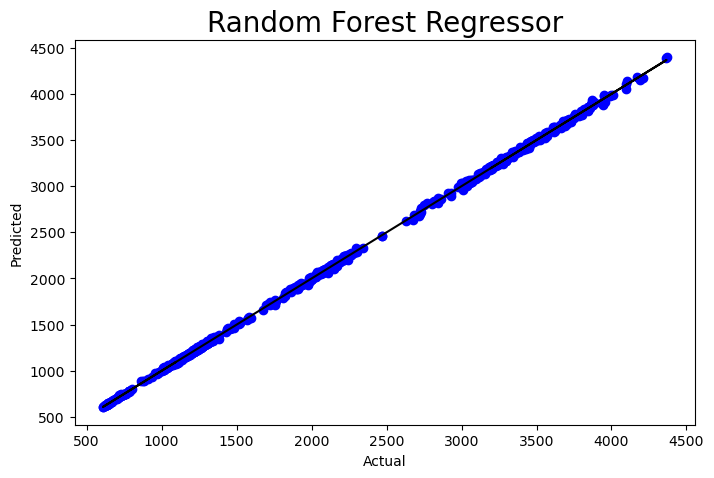

In [138]:
plt.figure(figsize = (8,5))
plt.scatter(x = pred_rf, y = y_test, color = 'blue')
plt.plot(pred_rf, pred_rf, color = 'black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor', fontsize = 20)
plt.show()

In [140]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_dt =dt.predict(x_test)
pred_train = dt.predict(x_train)
print("R2 score on test data:", r2_score(y_test,pred_dt))
print("R2 score on train data:", r2_score(y_train,pred_train)*100)
print('mean_absolute_error:',mean_absolute_error(y_test,pred_dt))
print('Mean squared error:', mean_squared_error(y_test, pred_dt))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_dt)))

R2 score on test data: 0.9997014534067
R2 score on train data: 100.0
mean_absolute_error: 11.76157942491269
Mean squared error: 313.060874453412
Root mean squared error: 17.693526343084127


In [142]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn =knn.predict(x_test)
pred_train = knn.predict(x_train)
print("R2 score on test data:", r2_score(y_test,pred_knn))
print("R2 score on train data:", r2_score(y_train,pred_train)*100)
print('mean_absolute_error:',mean_absolute_error(y_test,pred_knn))
print('Mean squared error:', mean_squared_error(y_test, pred_knn))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_knn)))

R2 score on test data: 0.9989334453936487
R2 score on train data: 99.93204183694571
mean_absolute_error: 22.21316889654375
Mean squared error: 1118.4067251479123
Root mean squared error: 33.44258849353489


In [144]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr =gbr.predict(x_test)
pred_train = gbr.predict(x_train)
print("R2 score on test data:", r2_score(y_test,pred_gbr))
print("R2 score on train data:", r2_score(y_train,pred_train)*100)
print('mean_absolute_error:',mean_absolute_error(y_test,pred_gbr))
print('Mean squared error:', mean_squared_error(y_test, pred_gbr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_gbr)))

R2 score on test data: 0.9997283772331453
R2 score on train data: 99.98792922998845
mean_absolute_error: 12.045314515785234
Mean squared error: 284.82810663845487
Root mean squared error: 16.876851206266377


In [146]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso =lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print("R2 score on test data:", r2_score(y_test,pred_lasso))
print("R2 score on train data:", r2_score(y_train,pred_train)*100)
print('mean_absolute_error:',mean_absolute_error(y_test,pred_lasso))
print('Mean squared error:', mean_squared_error(y_test, pred_lasso))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2 score on test data: 0.9994973682526044
R2 score on train data: 99.95184088661733
mean_absolute_error: 16.148513188297514
Mean squared error: 527.0679280859165
Root mean squared error: 22.957960015774844


In [148]:
rd = Ridge()
rd.fit(x_train,y_train)
pred_rd =rd.predict(x_test)
pred_train = rd.predict(x_train)
print("R2 score on test data:", r2_score(y_test,pred_rd))
print("R2 score on train data:", r2_score(y_train,pred_train)*100)
print('mean_absolute_error:',mean_absolute_error(y_test,pred_rd))
print('Mean squared error:', mean_squared_error(y_test, pred_rd))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_rd)))

R2 score on test data: 0.9997774030923771
R2 score on train data: 99.97688888832195
mean_absolute_error: 11.015504468443243
Mean squared error: 233.41878324848935
Root mean squared error: 15.278049065521728


In [150]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
pred_svr =svr.predict(x_test)
pred_train = svr.predict(x_train)
print("R2 score on test data:", r2_score(y_test,pred_svr))
print("R2 score on train data:", r2_score(y_train,pred_train)*100)
print('mean_absolute_error:',mean_absolute_error(y_test,pred_svr))
print('Mean squared error:', mean_squared_error(y_test, pred_svr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_svr)))

R2 score on test data: 0.6141825887866592
R2 score on train data: 59.8617090613637
mean_absolute_error: 488.6846852103229
Mean squared error: 404574.4913674267
Root mean squared error: 636.0617040566322


In [152]:
from sklearn.ensemble import ExtraTreesRegressor
exr =ExtraTreesRegressor()
exr.fit(x_train,y_train)
pred_exr =exr.predict(x_test)
pred_train = exr.predict(x_train)
print("R2 score on test data:", r2_score(y_test,pred_exr))
print("R2 score on train data:", r2_score(y_train,pred_train)*100)
print('mean_absolute_error:',mean_absolute_error(y_test,pred_exr))
print('Mean squared error:', mean_squared_error(y_test, pred_exr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_exr)))

R2 score on test data: 0.999809593100247
R2 score on train data: 100.0
mean_absolute_error: 9.680686757853133
Mean squared error: 199.6638108636748
Root mean squared error: 14.130244543661473


### Model evaluation

In [157]:
from sklearn.model_selection import cross_val_score as cvs

In [159]:
score = cvs(lr,x,y)
print(score)
print(score.mean()*100)
print("Difference between the r2 score and  validation score : ", (r2_score(y_test, pred_lr)-score.mean())*100)

[0.99918676 0.99201549 0.9993631  0.99947626 0.99767556]
99.75434359862459
Difference between the r2 score and  validation score :  0.23617840945610036


In [161]:
score1 = cvs(rf,x,y)
print(score1)
print(score1.mean()*100)
print("Difference between the r2 score and  validation score : ", (r2_score(y_test, pred_rf)-score1.mean())*100)

[0.03066733 0.98524106 0.99506348 0.9832584  0.96031425]
79.09089010048345
Difference between the r2 score and  validation score :  20.890144963866497


In [163]:
score2 = cvs(knn,x,y)
print(score2)
print(score2.mean()*100)
print("Difference between the r2 score and  validation score : ", (r2_score(y_test, pred_knn)-score2.mean())*100)

[-0.2502053   0.91063488  0.94883788  0.97778897  0.8940844 ]
69.62281649869364
Difference between the r2 score and  validation score :  30.27052804067123


In [165]:
score3 = cvs(gbr,x,y)
print(score3)
print(score3.mean()*100)
print("Difference between the r2 score and  validation score : ", (r2_score(y_test, pred_gbr)-score3.mean())*100)

[-0.00142881  0.97594899  0.99571183  0.98534438  0.96106557]
78.33283909101263
Difference between the r2 score and  validation score :  21.639998632301904


In [167]:
score4 = cvs(lasso,x,y)
print(score4)
print(score4.mean()*100)
print("Difference between the r2 score and  validation score : ", (r2_score(y_test, pred_lasso)-score4.mean())*100)

[0.99785458 0.9637165  0.99697697 0.99758142 0.99095256]
98.94164042975818
Difference between the r2 score and  validation score :  1.008096395502256


In [169]:
score5 = cvs(rd,x,y)
print(score5)
print(score5.mean()*100)
print("Difference between the r2 score and  validation score : ", (r2_score(y_test, pred_rd)-score5.mean())*100)

[0.99888692 0.98471609 0.99874989 0.99892062 0.99510011]
99.5274725640909
Difference between the r2 score and  validation score :  0.450267745146804


In [171]:
score6 = cvs(svr,x,y)
print(score6)
print(score6.mean()*100)
print("Difference between the r2 score and  validation score : ", (r2_score(y_test, pred_svr)-score6.mean())*100)

[-12.53404068 -45.30339341   0.85832689  -1.3607891  -26.70321715]
-1700.8622688504663
Difference between the r2 score and  validation score :  1762.280527729132


In [173]:
score7 = cvs(dt,x,y)
print(score7)
print(score7.mean()*100)
print("Difference between the r2 score and  validation score : ", (r2_score(y_test, pred_dt)-score7.mean())*100)

[-0.00481594  0.9720175   0.98926889  0.98003273  0.95585765]
77.84721657793095
Difference between the r2 score and  validation score :  22.122928762739058


In [175]:
score8 = cvs(exr,x,y)
print(score8)
print(score8.mean()*100)
print("Difference between the r2 score and  validation score : ", (r2_score(y_test, pred_exr)-score8.mean())*100)

[0.0346475  0.98696322 0.99847702 0.99887968 0.96250518]
79.62945222794626
Difference between the r2 score and  validation score :  20.351507082078435


From the above differnce between the r2 score and cross validation score of all the model we can conclude that ridge regressor model is the best fit and performing model with only 0.45 difference 

#### Applying Hypertuning on best fit model

In [179]:
from sklearn.model_selection import GridSearchCV

In [181]:
param = {'alpha':[1.0,0.05,0.4,2],
        'fit_intercept': [True,False],
        'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],
        'positive':[False,True],
        'random_state':[1,4,10,20]}
gscv = GridSearchCV(Ridge(),param, cv = 5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [183]:
gscv.best_params_

{'alpha': 0.05,
 'fit_intercept': True,
 'positive': False,
 'random_state': 1,
 'solver': 'auto'}

In [185]:
Model = Ridge(alpha = 0.05,fit_intercept = True, positive = False,random_state = 1,solver = 'auto')

In [191]:
Model.fit(x_train,y_train)
pred = Model.predict(x_test)
print("R2 score:", round(r2_score(y_test,pred)*100,2))
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print('Mean squared error:', mean_squared_error(y_test, pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred)))


R2 score: 99.99
mean_absolute_error: 7.7177421586961295
Mean squared error: 106.64729715652243
Root mean squared error: 10.327017824934865


In [193]:
import pickle
filename = 'TCS_stock_prediction.pkl'
pickle.dump(Model,open(filename,'wb'))

In [197]:
loaded_model = pickle.load(open('TCS_stock_prediction.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(round(result*100,2))

99.99


In [199]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]], index = ["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,849,850,851,852,853,854,855,856,857,858
Predicted,3196.088346,3791.463339,1286.234583,2060.771048,1267.178192,1200.597006,2749.662260,1227.274021,2912.141964,3169.186988,...,1572.684096,3971.113874,1118.727648,3280.085914,2713.568230,2210.917934,1159.505363,1873.3948,1902.465236,1093.349249
Original,3206.000000,3787.250000,1283.750000,2060.250000,1272.074951,1198.699951,2763.300049,1231.074951,2894.300049,3183.199951,...,1551.599976,3972.949951,1122.300049,3298.699951,2726.600098,2199.449951,1161.699951,1890.2500,1893.400024,1097.875000
